# LSTM and GRU

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To obtain the same results for each run, use random seeds in the keras and make the tensorflow operation decisive.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## Train LSTM Neural Network

In [3]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [5]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [6]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 34ms/step - loss: 0.6925 - accuracy: 0.5365 - val_loss: 0.6919 - val_accuracy: 0.5530
Epoch 2/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6904 - accuracy: 0.5943 - val_loss: 0.6890 - val_accuracy: 0.6034
Epoch 3/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6849 - accuracy: 0.6400 - val_loss: 0.6806 - val_accuracy: 0.6388
Epoch 4/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6581 - accuracy: 0.6748 - val_loss: 0.6282 - val_accuracy: 0.7050
Epoch 5/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6004 - accuracy: 0.7304 - val_loss: 0.5910 - val_accuracy: 0.7254
Epoch 6/100
313/313 [==============================] - 9s 30ms/step - loss: 0.5741 - accuracy: 0.7407 - val_loss: 0.5673 - val_accuracy: 0.7386
Epoch 7/100
313/313 [==============================] - 9s 29ms/step - loss: 0.5511 - accuracy: 0.7530 - val_loss: 0.5455 - val_accur

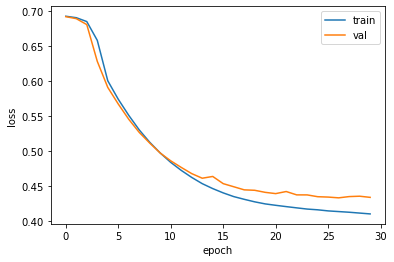

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## Apply Dropout to the Recurrent Layer

In [8]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 30ms/step - loss: 0.6923 - accuracy: 0.5397 - val_loss: 0.6913 - val_accuracy: 0.5808
Epoch 2/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6898 - accuracy: 0.5940 - val_loss: 0.6883 - val_accuracy: 0.6160
Epoch 3/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6855 - accuracy: 0.6259 - val_loss: 0.6827 - val_accuracy: 0.6308
Epoch 4/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6756 - accuracy: 0.6324 - val_loss: 0.6672 - val_accuracy: 0.6240
Epoch 5/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6418 - accuracy: 0.6754 - val_loss: 0.6243 - val_accuracy: 0.7018
Epoch 6/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6074 - accuracy: 0.7257 - val_loss: 0.6005 - val_accuracy: 0.7306
Epoch 7/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5877 - accuracy: 0.7426 - val_loss: 0.5835 - val_accuracy

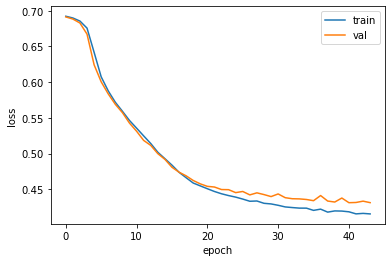

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## Connect Two Layers

In [11]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 21s 57ms/step - loss: 0.6926 - accuracy: 0.5339 - val_loss: 0.6915 - val_accuracy: 0.5832
Epoch 2/100
313/313 [==============================] - 16s 53ms/step - loss: 0.6843 - accuracy: 0.6409 - val_loss: 0.6673 - val_accuracy: 0.6720
Epoch 3/100
313/313 [==============================] - 17s 54ms/step - loss: 0.6158 - accuracy: 0.6945 - val_loss: 0.5754 - val_accuracy: 0.7198
Epoch 4/100
313/313 [==============================] - 17s 54ms/step - loss: 0.5569 - accuracy: 0.7294 - val_loss: 0.5381 - val_accuracy: 0.7446
Epoch 5/100
313/313 [==============================] - 18s 58ms/step - loss: 0.5273 - accuracy: 0.7493 - val_loss: 0.5113 - val_accuracy: 0.7594
Epoch 6/100
313/313 [==============================] - 17s 54ms/step - loss: 0.5060 - accuracy: 0.7617 - val_loss: 0.4964 - val_accuracy: 0.7698
Epoch 7/100
313/313 [==============================] - 17s 55ms/step - loss: 0.4952 - accuracy: 0.7692 - val_loss: 0.4848 - val_ac

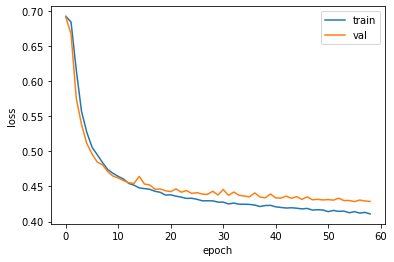

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## Train GRU Neural Network

In [14]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [15]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 31ms/step - loss: 0.6918 - accuracy: 0.5544 - val_loss: 0.6908 - val_accuracy: 0.5840
Epoch 2/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6889 - accuracy: 0.5910 - val_loss: 0.6875 - val_accuracy: 0.5962
Epoch 3/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6841 - accuracy: 0.6109 - val_loss: 0.6821 - val_accuracy: 0.6052
Epoch 4/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6765 - accuracy: 0.6257 - val_loss: 0.6732 - val_accuracy: 0.6158
Epoch 5/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6641 - accuracy: 0.6388 - val_loss: 0.6590 - val_accuracy: 0.6294
Epoch 6/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6433 - accuracy: 0.6600 - val_loss: 0.6336 - val_accuracy: 0.6648
Epoch 7/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6031 - accuracy: 0.6914 - val_loss: 0.5803 - val_accuracy

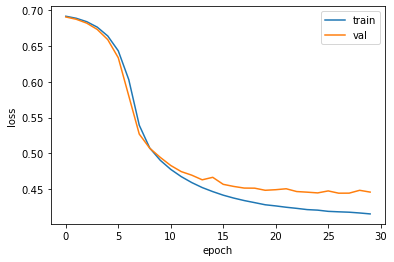

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## End

In [17]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 8s 9ms/step - loss: 0.4223 - accuracy: 0.8026


[0.42233479022979736, 0.8025599718093872]